# Linear regression with Variational Bayes

### Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from scipy.stats import multivariate_normal

### Define model and generate data

In [2]:
N = 10   # No. data points
w0 = 1.    # The offset in the line y = w0 + w1 * x
w1 = .5   # The incline in the same line
gamma = 4. # The *precision* in the observation noise
st_dev = 1. / np.sqrt(gamma)  # And corresponding standard deviation
np.random.seed(42)
x = 5 * np.random.rand(N) - 1    # The x-points are sampled uniformly on [-1, 4]
y = np.random.normal(loc=w0 + w1 * x, scale=st_dev) # And the response is sampled from the Normal

### Plotting of data (i.e., $x$-axis is the covariate, $y$-axis the response)

In [3]:
def data_plotter(x, y=None, true_w0=None, true_w1=None,
                 approx_w0=None, approx_w1=None):
    """
    Use to plot data. If y is not noe it contains responses, and (x,y) will be scatter-plotted
    If neither true_w0 nor true_w1 is None, we will plot the line true_w0 + x * true_w1 in red.
    If neither approx_w0 nor approx_w1 is None, we plot the line approx_w0 + x * approx_w1 in green.
    """
    if y is not None:
        plt.plot(x, y, "bo")

    # Plot true line if given
    if true_w0 is not None and true_w1 is not None:
        plt.plot(x, true_w0 + true_w1 * x, "r-")

    # Plot approximation if given
    if approx_w0 is not None and approx_w1 is not None:
        plt.plot(x, approx_w0+ approx_w1* x, "g-", alpha=.2)


### ... and of densities ($x$-axis correspond to offset $w_0$, $y$-axis the incline $w_1$)

In [4]:
def density_plt(x_range, y_range,
                true_loc=None, true_cov=None,
                approx_loc=None, approx_cov=None):
    """
    Same setup as above: We can choose to plot the "true" solution (in red) and/or the approximation (in green)    
    """
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    x_mesh, y_mesh = np.meshgrid(x, y)
    pos = np.empty(x_mesh.shape + (2,))
    pos[:, :, 0] = x_mesh
    pos[:, :, 1] = y_mesh

    if true_loc is not None and true_cov is not None:
        rv = multivariate_normal(true_loc, true_cov)
        plt.contour(x, y, rv.pdf(pos), colors='r')

    if approx_loc is not None and true_cov is not None:
        rv = multivariate_normal(approx_loc, approx_cov)
        plt.contour(x, y, rv.pdf(pos), colors='g')
        

### Check that it works: Plot the data with the true model on top, and the prior over ($w_0$, $w_1$)

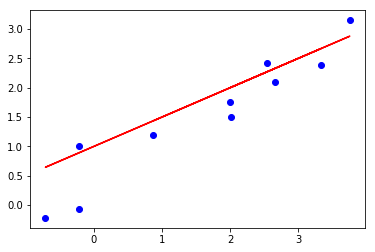

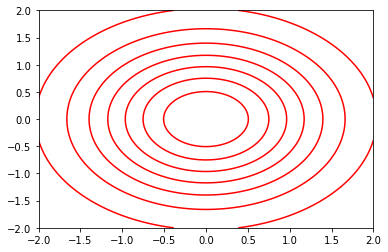

In [5]:
# Plot data
data_plotter(x=x, y=y, true_w0=w0, true_w1=w1)
plt.show()

# Plot prior of (w0, w1)
density_plt(x_range=[-2, 2], y_range=[-2, 2],
            true_loc=[0, 0], true_cov=[[1, 0], [0, 1]])
plt.show()


## Learn the parameters using the variational Bayes formulas
We have **two** variables of interest here, $w_0$ and $w_1$. Both are Gaussian a posteriori, and they are parameterized by their **mean** and **precision** (inverse variance). 

The update rules are as follows:

* `q_0_prec` := $1 + \gamma \cdot N$.
* `q_0_mean` := $\gamma \cdot (\sum_i y_i - $ `q_1_mean` $ \cdot \sum_i x_i) /$ `q_0_prec`.
* `q_1_prec` := $1 + \gamma \cdot \sum_i x_i^2$.
* `q_1_mean` := $\gamma \cdot (\sum_i x_i y_i - $ `q_0_mean`  $\cdot \sum_i x_i) /$ `q_1_prec`.

In [6]:
# Starting-point
q_0_mean = 0.
q_1_mean = 0.
q_0_prec = 1.
q_1_prec = 1.

# Iterate
for iter in range(25):
    q_0_prec = 1 + N * gamma
    q_0_mean = gamma*(np.sum(y) - q_1_mean * np.sum(x)) / q_0_prec

    q_1_prec= 1 + np.sum(x * x) * gamma
    q_1_mean = gamma * (np.sum(y * x) - q_0_mean * np.sum(x)) / q_1_prec
    
    print("Iter {:2d}:  W0: {:6.3f} +/- {:6.3f}".format(iter, q_0_mean, 1./np.sqrt(q_0_prec)), 
          "\tW1: {:6.3f} +/- {:6.3f}".format(q_1_mean, 1./np.sqrt(q_1_prec))         )

Iter  0:  W0:  1.487 +/-  0.156 	W1:  0.315 +/-  0.072
Iter  1:  W0:  0.996 +/-  0.156 	W1:  0.478 +/-  0.072
Iter  2:  W0:  0.742 +/-  0.156 	W1:  0.562 +/-  0.072
Iter  3:  W0:  0.610 +/-  0.156 	W1:  0.605 +/-  0.072
Iter  4:  W0:  0.542 +/-  0.156 	W1:  0.628 +/-  0.072
Iter  5:  W0:  0.507 +/-  0.156 	W1:  0.640 +/-  0.072
Iter  6:  W0:  0.489 +/-  0.156 	W1:  0.646 +/-  0.072
Iter  7:  W0:  0.479 +/-  0.156 	W1:  0.649 +/-  0.072
Iter  8:  W0:  0.474 +/-  0.156 	W1:  0.650 +/-  0.072
Iter  9:  W0:  0.472 +/-  0.156 	W1:  0.651 +/-  0.072
Iter 10:  W0:  0.471 +/-  0.156 	W1:  0.652 +/-  0.072
Iter 11:  W0:  0.470 +/-  0.156 	W1:  0.652 +/-  0.072
Iter 12:  W0:  0.470 +/-  0.156 	W1:  0.652 +/-  0.072
Iter 13:  W0:  0.469 +/-  0.156 	W1:  0.652 +/-  0.072
Iter 14:  W0:  0.469 +/-  0.156 	W1:  0.652 +/-  0.072
Iter 15:  W0:  0.469 +/-  0.156 	W1:  0.652 +/-  0.072
Iter 16:  W0:  0.469 +/-  0.156 	W1:  0.652 +/-  0.072
Iter 17:  W0:  0.469 +/-  0.156 	W1:  0.652 +/-  0.072
Iter 18:  

## Show off 
### The variables `q_0_mean`, `q_0_prec`, `q_1_mean`, and `q_1_prec` must be filled for this to work

### First draw some random lines, i.e., values $(w_0, w_1)$, from the Variational Bayes posterior 

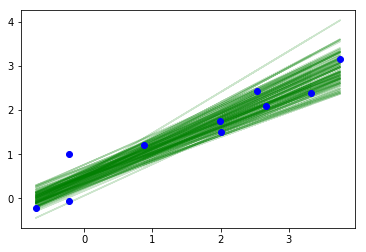

In [7]:
for _ in range(100):
    w0_sample = np.random.normal(loc=q_0_mean, scale=1/np.sqrt(q_0_prec))
    w1_sample = np.random.normal(loc=q_1_mean, scale=1 / np.sqrt(q_1_prec))
    data_plotter(x=x, approx_w0=w0_sample, approx_w1=w1_sample)
data_plotter(x=x, y=y)
plt.show()

### And finally, look at the joint pdf of (w0, w1) compared to the exact Bayesian solution

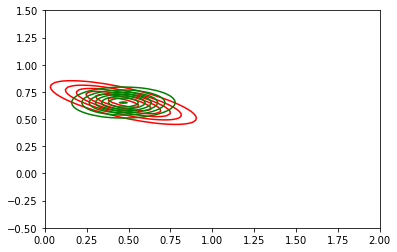

In [8]:
extended_x = np.ones((N, 2))
extended_x[:, 1] = x
kernel = np.linalg.inv(np.eye(2) / gamma
                       + np.matmul(np.transpose(extended_x), extended_x))
bayesian_mean = np.matmul(kernel, np.matmul(np.transpose(extended_x), y))
bayesian_cov = kernel / gamma

density_plt(x_range=[w0 - 2. * st_dev, w0 + 2. * st_dev],
            y_range=[w1 - 2. * st_dev, w1 + 2. * st_dev],
            true_loc=bayesian_mean,
            true_cov=bayesian_cov,
            approx_loc=[q_0_mean, q_1_mean],
            approx_cov=[[1/q_0_prec, 0], [0, 1/q_1_prec]])
plt.show()